In [1]:
import os
import sys
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.preprocessing import OneHotEncoder

# Add the parent directory to path to import your modules
os.chdir("../..")
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from lib import *


Sparsity with L1 penalty: 77.97%
Test score with L1 penalty: 0.8340
Example run in 15.494 s


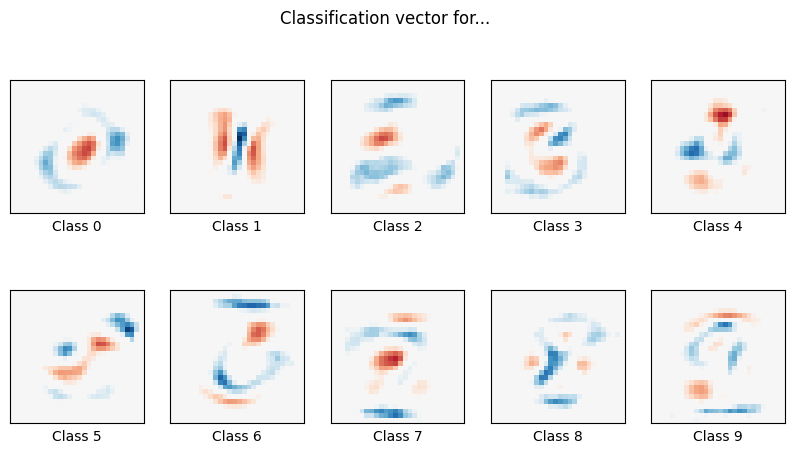

In [2]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

In [3]:
# Convert labels to one-hot encoding for neural network
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))

# Create validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train_onehot, test_size=0.2, random_state=42
)

# Print dataset information
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Input features: {X_train.shape[1]}")
print(f"Output classes: {y_train_onehot.shape[1]}")

Training set: 4000 samples
Validation set: 1000 samples
Test set: 10000 samples
Input features: 784
Output classes: 10


### Pengaruh Inisialisasi Bobot

In [4]:
# Define depth
depth_variations = [
    [784, 156, 156, 156, 10]
]

# Define activation functions
activation_variations = [
    [Sigmoid(), Sigmoid(), Sigmoid(), Softmax()]
]

In [5]:
# Create Neural Network
zero_init_network = NeuralNetwork(
    node_counts = depth_variations[0],
    activations = activation_variations[0],
    loss_function = MSE(),
    initialize_methods = ZeroInitializer()
)

normal_init_network = NeuralNetwork(
    node_counts = depth_variations[0],
    activations = activation_variations[0],
    loss_function = MSE(),
    initialize_methods = NormalInitializer(seed=22)
)

uniform_init_network = NeuralNetwork(
    node_counts = depth_variations[0],
    activations = activation_variations[0],
    loss_function = MSE(),
    initialize_methods = UniformInitializer(seed=22)
)

xavier_init_network = NeuralNetwork(
    node_counts = depth_variations[0],
    activations = activation_variations[0],
    loss_function = MSE(),
    initialize_methods = XavierInitializer(seed=22)
)

he_init_network = NeuralNetwork(
    node_counts = depth_variations[0],
    activations = activation_variations[0],
    loss_function = MSE(),
    initialize_methods = HeInitializer(seed=22)
)

In [6]:
# Create FFNN model
ffnn_zero_init = FFNN(zero_init_network)

ffnn_normal_init = FFNN(normal_init_network)

ffnn_uniform_init = FFNN(uniform_init_network)

ffnn_xavier_init = FFNN(xavier_init_network)

ffnn_he_init = FFNN(he_init_network)

In [7]:
# Train the model
zero_init_history = ffnn_zero_init.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

normal_init_history = ffnn_normal_init.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

uniform_init_history = ffnn_uniform_init.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

xavier_init_history = ffnn_xavier_init.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

he_init_history = ffnn_he_init.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

Epoch 1/20: 100%|██████████| 125/125 [00:00<00:00, 162.73it/s, loss=0.9000]


Epoch 1/20 - 0.80s - loss: 0.9000 - val_loss: 0.9002


Epoch 2/20: 100%|██████████| 125/125 [00:00<00:00, 217.43it/s, loss=0.8998]


Epoch 2/20 - 0.60s - loss: 0.8998 - val_loss: 0.9005


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 182.40it/s, loss=0.8998]


Epoch 3/20 - 0.71s - loss: 0.8998 - val_loss: 0.9006


Epoch 4/20: 100%|██████████| 125/125 [00:00<00:00, 235.24it/s, loss=0.8998]


Epoch 4/20 - 0.56s - loss: 0.8998 - val_loss: 0.9007


Epoch 5/20: 100%|██████████| 125/125 [00:00<00:00, 209.83it/s, loss=0.8998]


Epoch 5/20 - 0.62s - loss: 0.8998 - val_loss: 0.9007


Epoch 6/20: 100%|██████████| 125/125 [00:00<00:00, 184.64it/s, loss=0.8998]


Epoch 6/20 - 0.70s - loss: 0.8998 - val_loss: 0.9007


Epoch 7/20: 100%|██████████| 125/125 [00:00<00:00, 131.62it/s, loss=0.8998]


Epoch 7/20 - 1.01s - loss: 0.8998 - val_loss: 0.9008


Epoch 8/20: 100%|██████████| 125/125 [00:01<00:00, 100.66it/s, loss=0.8998]


Epoch 8/20 - 1.30s - loss: 0.8998 - val_loss: 0.9008


Epoch 9/20: 100%|██████████| 125/125 [00:01<00:00, 81.72it/s, loss=0.8998]


Epoch 9/20 - 1.57s - loss: 0.8998 - val_loss: 0.9007


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 127.92it/s, loss=0.8998]


Epoch 10/20 - 1.01s - loss: 0.8998 - val_loss: 0.9008


Epoch 11/20: 100%|██████████| 125/125 [00:00<00:00, 150.65it/s, loss=0.8998]


Epoch 11/20 - 0.86s - loss: 0.8998 - val_loss: 0.9008


Epoch 12/20: 100%|██████████| 125/125 [00:00<00:00, 146.18it/s, loss=0.8998]


Epoch 12/20 - 0.90s - loss: 0.8998 - val_loss: 0.9008


Epoch 13/20: 100%|██████████| 125/125 [00:01<00:00, 87.30it/s, loss=0.8998]


Epoch 13/20 - 1.46s - loss: 0.8998 - val_loss: 0.9007


Epoch 14/20: 100%|██████████| 125/125 [00:01<00:00, 75.16it/s, loss=0.8998]


Epoch 14/20 - 1.69s - loss: 0.8998 - val_loss: 0.9007


Epoch 15/20: 100%|██████████| 125/125 [00:00<00:00, 173.55it/s, loss=0.8998]


Epoch 15/20 - 0.75s - loss: 0.8998 - val_loss: 0.9008


Epoch 16/20: 100%|██████████| 125/125 [00:01<00:00, 117.51it/s, loss=0.8998]


Epoch 16/20 - 1.09s - loss: 0.8998 - val_loss: 0.9008


Epoch 17/20: 100%|██████████| 125/125 [00:00<00:00, 182.25it/s, loss=0.8998]


Epoch 17/20 - 0.71s - loss: 0.8998 - val_loss: 0.9006


Epoch 18/20: 100%|██████████| 125/125 [00:00<00:00, 166.27it/s, loss=0.8998]


Epoch 18/20 - 0.78s - loss: 0.8998 - val_loss: 0.9008


Epoch 19/20: 100%|██████████| 125/125 [00:00<00:00, 172.23it/s, loss=0.8998]


Epoch 19/20 - 0.93s - loss: 0.8998 - val_loss: 0.9007


Epoch 20/20: 100%|██████████| 125/125 [00:01<00:00, 112.96it/s, loss=0.8998]


Epoch 20/20 - 1.16s - loss: 0.8998 - val_loss: 0.9007


Epoch 1/20: 100%|██████████| 125/125 [00:00<00:00, 131.65it/s, loss=1.0064]


Epoch 1/20 - 1.01s - loss: 1.0064 - val_loss: 0.9700


Epoch 2/20: 100%|██████████| 125/125 [00:01<00:00, 70.04it/s, loss=0.9394] 


Epoch 2/20 - 1.83s - loss: 0.9394 - val_loss: 0.9393


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 174.77it/s, loss=0.9068]


Epoch 3/20 - 0.74s - loss: 0.9068 - val_loss: 0.9070


Epoch 4/20: 100%|██████████| 125/125 [00:00<00:00, 175.20it/s, loss=0.8757]


Epoch 4/20 - 0.74s - loss: 0.8757 - val_loss: 0.8776


Epoch 5/20: 100%|██████████| 125/125 [00:00<00:00, 171.25it/s, loss=0.8511]


Epoch 5/20 - 0.77s - loss: 0.8511 - val_loss: 0.8569


Epoch 6/20: 100%|██████████| 125/125 [00:00<00:00, 178.17it/s, loss=0.8312]


Epoch 6/20 - 0.73s - loss: 0.8312 - val_loss: 0.8406


Epoch 7/20: 100%|██████████| 125/125 [00:00<00:00, 173.78it/s, loss=0.8139]


Epoch 7/20 - 0.75s - loss: 0.8139 - val_loss: 0.8252


Epoch 8/20: 100%|██████████| 125/125 [00:00<00:00, 150.17it/s, loss=0.7975]


Epoch 8/20 - 0.86s - loss: 0.7975 - val_loss: 0.8099


Epoch 9/20: 100%|██████████| 125/125 [00:01<00:00, 96.52it/s, loss=0.7818]


Epoch 9/20 - 1.32s - loss: 0.7818 - val_loss: 0.7944


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 177.12it/s, loss=0.7670]


Epoch 10/20 - 0.73s - loss: 0.7670 - val_loss: 0.7813


Epoch 11/20: 100%|██████████| 125/125 [00:00<00:00, 171.80it/s, loss=0.7532]


Epoch 11/20 - 0.76s - loss: 0.7532 - val_loss: 0.7687


Epoch 12/20: 100%|██████████| 125/125 [00:00<00:00, 174.51it/s, loss=0.7400]


Epoch 12/20 - 0.76s - loss: 0.7400 - val_loss: 0.7548


Epoch 13/20: 100%|██████████| 125/125 [00:00<00:00, 155.07it/s, loss=0.7273]


Epoch 13/20 - 0.84s - loss: 0.7273 - val_loss: 0.7438


Epoch 14/20: 100%|██████████| 125/125 [00:00<00:00, 148.70it/s, loss=0.7152]


Epoch 14/20 - 0.87s - loss: 0.7152 - val_loss: 0.7316


Epoch 15/20: 100%|██████████| 125/125 [00:00<00:00, 173.09it/s, loss=0.7037]


Epoch 15/20 - 0.76s - loss: 0.7037 - val_loss: 0.7216


Epoch 16/20: 100%|██████████| 125/125 [00:00<00:00, 170.91it/s, loss=0.6923]


Epoch 16/20 - 0.76s - loss: 0.6923 - val_loss: 0.7122


Epoch 17/20: 100%|██████████| 125/125 [00:00<00:00, 169.80it/s, loss=0.6816]


Epoch 17/20 - 0.77s - loss: 0.6816 - val_loss: 0.7014


Epoch 18/20: 100%|██████████| 125/125 [00:01<00:00, 103.96it/s, loss=0.6714]


Epoch 18/20 - 1.26s - loss: 0.6714 - val_loss: 0.6923


Epoch 19/20: 100%|██████████| 125/125 [00:01<00:00, 102.24it/s, loss=0.6612]


Epoch 19/20 - 1.26s - loss: 0.6612 - val_loss: 0.6846


Epoch 20/20: 100%|██████████| 125/125 [00:00<00:00, 128.50it/s, loss=0.6513]


Epoch 20/20 - 1.01s - loss: 0.6513 - val_loss: 0.6745


Epoch 1/20: 100%|██████████| 125/125 [00:01<00:00, 119.92it/s, loss=0.9002]


Epoch 1/20 - 1.09s - loss: 0.9002 - val_loss: 0.9007


Epoch 2/20: 100%|██████████| 125/125 [00:01<00:00, 117.06it/s, loss=0.8999]


Epoch 2/20 - 1.12s - loss: 0.8999 - val_loss: 0.9008


Epoch 3/20: 100%|██████████| 125/125 [00:01<00:00, 110.32it/s, loss=0.8999]


Epoch 3/20 - 1.17s - loss: 0.8999 - val_loss: 0.9008


Epoch 4/20: 100%|██████████| 125/125 [00:00<00:00, 127.73it/s, loss=0.8998]


Epoch 4/20 - 1.01s - loss: 0.8998 - val_loss: 0.9007


Epoch 5/20: 100%|██████████| 125/125 [00:00<00:00, 147.92it/s, loss=0.8998]


Epoch 5/20 - 0.87s - loss: 0.8998 - val_loss: 0.9008


Epoch 6/20: 100%|██████████| 125/125 [00:00<00:00, 160.52it/s, loss=0.8998]


Epoch 6/20 - 0.81s - loss: 0.8998 - val_loss: 0.9008


Epoch 7/20: 100%|██████████| 125/125 [00:00<00:00, 140.01it/s, loss=0.8998]


Epoch 7/20 - 0.93s - loss: 0.8998 - val_loss: 0.9006


Epoch 8/20: 100%|██████████| 125/125 [00:00<00:00, 142.87it/s, loss=0.8998]


Epoch 8/20 - 0.90s - loss: 0.8998 - val_loss: 0.9005


Epoch 9/20: 100%|██████████| 125/125 [00:01<00:00, 113.06it/s, loss=0.8998]


Epoch 9/20 - 1.15s - loss: 0.8998 - val_loss: 0.9007


Epoch 10/20: 100%|██████████| 125/125 [00:01<00:00, 103.57it/s, loss=0.8998]


Epoch 10/20 - 1.27s - loss: 0.8998 - val_loss: 0.9007


Epoch 11/20: 100%|██████████| 125/125 [00:01<00:00, 88.56it/s, loss=0.8998] 


Epoch 11/20 - 1.45s - loss: 0.8998 - val_loss: 0.9007


Epoch 12/20: 100%|██████████| 125/125 [00:00<00:00, 129.06it/s, loss=0.8998]


Epoch 12/20 - 1.00s - loss: 0.8998 - val_loss: 0.9007


Epoch 13/20: 100%|██████████| 125/125 [00:00<00:00, 142.48it/s, loss=0.8998]


Epoch 13/20 - 0.90s - loss: 0.8998 - val_loss: 0.9006


Epoch 14/20: 100%|██████████| 125/125 [00:00<00:00, 146.71it/s, loss=0.8998]


Epoch 14/20 - 0.90s - loss: 0.8998 - val_loss: 0.9007


Epoch 15/20: 100%|██████████| 125/125 [00:00<00:00, 137.94it/s, loss=0.8998]


Epoch 15/20 - 0.94s - loss: 0.8998 - val_loss: 0.9007


Epoch 16/20: 100%|██████████| 125/125 [00:00<00:00, 153.34it/s, loss=0.8998]


Epoch 16/20 - 0.86s - loss: 0.8998 - val_loss: 0.9007


Epoch 17/20: 100%|██████████| 125/125 [00:00<00:00, 149.87it/s, loss=0.8998]


Epoch 17/20 - 0.86s - loss: 0.8998 - val_loss: 0.9006


Epoch 18/20: 100%|██████████| 125/125 [00:00<00:00, 131.77it/s, loss=0.8998]


Epoch 18/20 - 0.97s - loss: 0.8998 - val_loss: 0.9007


Epoch 19/20: 100%|██████████| 125/125 [00:00<00:00, 143.92it/s, loss=0.8998]


Epoch 19/20 - 0.92s - loss: 0.8998 - val_loss: 0.9007


Epoch 20/20: 100%|██████████| 125/125 [00:00<00:00, 153.71it/s, loss=0.8998]


Epoch 20/20 - 0.85s - loss: 0.8998 - val_loss: 0.9006


Epoch 1/20: 100%|██████████| 125/125 [00:00<00:00, 145.63it/s, loss=0.9050]


Epoch 1/20 - 0.88s - loss: 0.9050 - val_loss: 0.9035


Epoch 2/20: 100%|██████████| 125/125 [00:00<00:00, 152.13it/s, loss=0.9006]


Epoch 2/20 - 0.85s - loss: 0.9006 - val_loss: 0.9016


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 136.62it/s, loss=0.8998]


Epoch 3/20 - 0.94s - loss: 0.8998 - val_loss: 0.9008


Epoch 4/20: 100%|██████████| 125/125 [00:01<00:00, 123.76it/s, loss=0.8996]


Epoch 4/20 - 1.04s - loss: 0.8996 - val_loss: 0.9004


Epoch 5/20: 100%|██████████| 125/125 [00:00<00:00, 153.50it/s, loss=0.8994]


Epoch 5/20 - 0.84s - loss: 0.8994 - val_loss: 0.9003


Epoch 6/20: 100%|██████████| 125/125 [00:00<00:00, 156.58it/s, loss=0.8993]


Epoch 6/20 - 0.83s - loss: 0.8993 - val_loss: 0.9002


Epoch 7/20: 100%|██████████| 125/125 [00:00<00:00, 157.06it/s, loss=0.8991]


Epoch 7/20 - 0.82s - loss: 0.8991 - val_loss: 0.8999


Epoch 8/20: 100%|██████████| 125/125 [00:00<00:00, 149.74it/s, loss=0.8989]


Epoch 8/20 - 0.86s - loss: 0.8989 - val_loss: 0.8998


Epoch 9/20: 100%|██████████| 125/125 [00:00<00:00, 139.31it/s, loss=0.8987]


Epoch 9/20 - 0.93s - loss: 0.8987 - val_loss: 0.8996


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 162.14it/s, loss=0.8985]


Epoch 10/20 - 0.82s - loss: 0.8985 - val_loss: 0.8994


Epoch 11/20: 100%|██████████| 125/125 [00:00<00:00, 159.38it/s, loss=0.8984]


Epoch 11/20 - 0.81s - loss: 0.8984 - val_loss: 0.8992


Epoch 12/20: 100%|██████████| 125/125 [00:00<00:00, 155.10it/s, loss=0.8982]


Epoch 12/20 - 0.83s - loss: 0.8982 - val_loss: 0.8990


Epoch 13/20: 100%|██████████| 125/125 [00:00<00:00, 171.93it/s, loss=0.8981]


Epoch 13/20 - 0.76s - loss: 0.8981 - val_loss: 0.8988


Epoch 14/20: 100%|██████████| 125/125 [00:00<00:00, 143.91it/s, loss=0.8979]


Epoch 14/20 - 0.91s - loss: 0.8979 - val_loss: 0.8988


Epoch 15/20: 100%|██████████| 125/125 [00:01<00:00, 120.66it/s, loss=0.8977]


Epoch 15/20 - 1.07s - loss: 0.8977 - val_loss: 0.8986


Epoch 16/20: 100%|██████████| 125/125 [00:01<00:00, 106.83it/s, loss=0.8976]


Epoch 16/20 - 1.22s - loss: 0.8976 - val_loss: 0.8985


Epoch 17/20: 100%|██████████| 125/125 [00:01<00:00, 120.44it/s, loss=0.8974]


Epoch 17/20 - 1.07s - loss: 0.8974 - val_loss: 0.8983


Epoch 18/20: 100%|██████████| 125/125 [00:00<00:00, 150.09it/s, loss=0.8972]


Epoch 18/20 - 0.89s - loss: 0.8972 - val_loss: 0.8982


Epoch 19/20: 100%|██████████| 125/125 [00:00<00:00, 130.19it/s, loss=0.8970]


Epoch 19/20 - 1.00s - loss: 0.8970 - val_loss: 0.8982


Epoch 20/20: 100%|██████████| 125/125 [00:01<00:00, 123.97it/s, loss=0.8968]


Epoch 20/20 - 1.04s - loss: 0.8968 - val_loss: 0.8978


Epoch 1/20: 100%|██████████| 125/125 [00:01<00:00, 72.43it/s, loss=0.9157]


Epoch 1/20 - 1.77s - loss: 0.9157 - val_loss: 0.9100


Epoch 2/20: 100%|██████████| 125/125 [00:00<00:00, 132.90it/s, loss=0.9018]


Epoch 2/20 - 0.98s - loss: 0.9018 - val_loss: 0.9024


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 132.49it/s, loss=0.8989]


Epoch 3/20 - 1.04s - loss: 0.8989 - val_loss: 0.9002


Epoch 4/20: 100%|██████████| 125/125 [00:01<00:00, 104.48it/s, loss=0.8981]


Epoch 4/20 - 1.25s - loss: 0.8981 - val_loss: 0.8997


Epoch 5/20: 100%|██████████| 125/125 [00:01<00:00, 100.83it/s, loss=0.8975]


Epoch 5/20 - 1.30s - loss: 0.8975 - val_loss: 0.8990


Epoch 6/20: 100%|██████████| 125/125 [00:00<00:00, 132.68it/s, loss=0.8970]


Epoch 6/20 - 0.97s - loss: 0.8970 - val_loss: 0.8986


Epoch 7/20: 100%|██████████| 125/125 [00:01<00:00, 118.34it/s, loss=0.8965]


Epoch 7/20 - 1.10s - loss: 0.8965 - val_loss: 0.8979


Epoch 8/20: 100%|██████████| 125/125 [00:01<00:00, 99.61it/s, loss=0.8959] 


Epoch 8/20 - 1.29s - loss: 0.8959 - val_loss: 0.8973


Epoch 9/20: 100%|██████████| 125/125 [00:01<00:00, 120.34it/s, loss=0.8953]


Epoch 9/20 - 1.08s - loss: 0.8953 - val_loss: 0.8968


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 156.12it/s, loss=0.8947]


Epoch 10/20 - 0.84s - loss: 0.8947 - val_loss: 0.8963


Epoch 11/20: 100%|██████████| 125/125 [00:00<00:00, 143.63it/s, loss=0.8941]


Epoch 11/20 - 0.90s - loss: 0.8941 - val_loss: 0.8959


Epoch 12/20: 100%|██████████| 125/125 [00:00<00:00, 165.41it/s, loss=0.8935]


Epoch 12/20 - 0.78s - loss: 0.8935 - val_loss: 0.8952


Epoch 13/20: 100%|██████████| 125/125 [00:00<00:00, 128.39it/s, loss=0.8929]


Epoch 13/20 - 1.02s - loss: 0.8929 - val_loss: 0.8948


Epoch 14/20: 100%|██████████| 125/125 [00:00<00:00, 130.40it/s, loss=0.8923]


Epoch 14/20 - 0.99s - loss: 0.8923 - val_loss: 0.8941


Epoch 15/20: 100%|██████████| 125/125 [00:01<00:00, 103.95it/s, loss=0.8917]


Epoch 15/20 - 1.27s - loss: 0.8917 - val_loss: 0.8936


Epoch 16/20: 100%|██████████| 125/125 [00:01<00:00, 103.09it/s, loss=0.8910]


Epoch 16/20 - 1.26s - loss: 0.8910 - val_loss: 0.8930


Epoch 17/20: 100%|██████████| 125/125 [00:01<00:00, 118.25it/s, loss=0.8903]


Epoch 17/20 - 1.11s - loss: 0.8903 - val_loss: 0.8924


Epoch 18/20: 100%|██████████| 125/125 [00:01<00:00, 122.08it/s, loss=0.8897]


Epoch 18/20 - 1.05s - loss: 0.8897 - val_loss: 0.8919


Epoch 19/20: 100%|██████████| 125/125 [00:01<00:00, 106.61it/s, loss=0.8889]


Epoch 19/20 - 1.22s - loss: 0.8889 - val_loss: 0.8911


Epoch 20/20: 100%|██████████| 125/125 [00:01<00:00, 117.13it/s, loss=0.8882]


Epoch 20/20 - 1.10s - loss: 0.8882 - val_loss: 0.8903


In [ ]:
# Evaluate the model
evaluate_model(ffnn_zero_init, X_test, y_test_onehot)

evaluate_model(ffnn_normal_init, X_test, y_test_onehot)

evaluate_model(ffnn_uniform_init, X_test, y_test_onehot)

evaluate_model(ffnn_xavier_init, X_test, y_test_onehot)

evaluate_model(ffnn_he_init, X_test, y_test_onehot)

Accuracy of zero initial network: 0.9000863836
Accuracy of normal initial network: 0.6602696662
Accuracy of uniform initial network: 0.9000415372
Accuracy of xavier initial network: 0.8971488531
Accuracy of he initial network: 0.8886566840


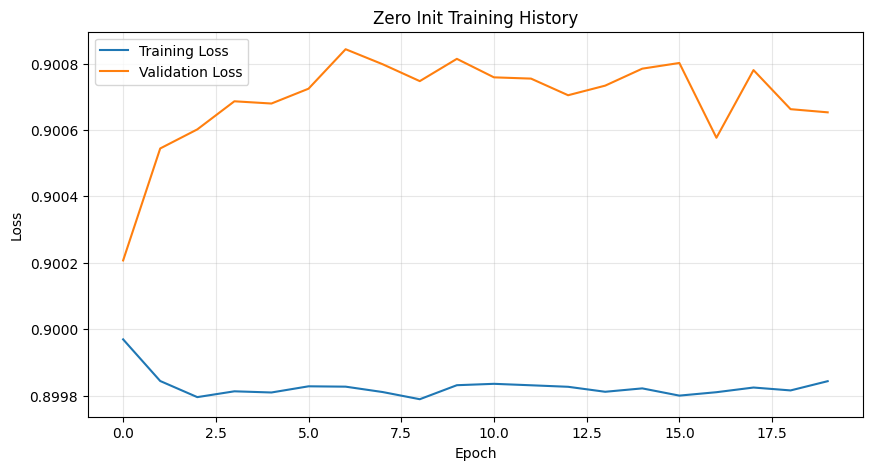

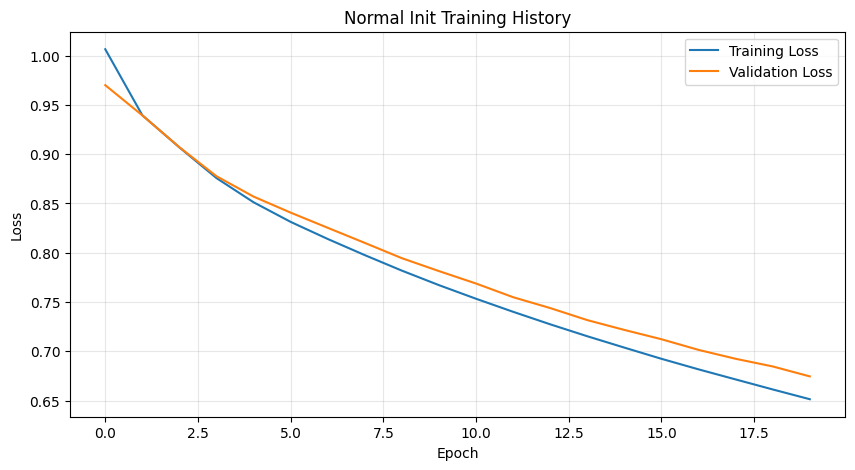

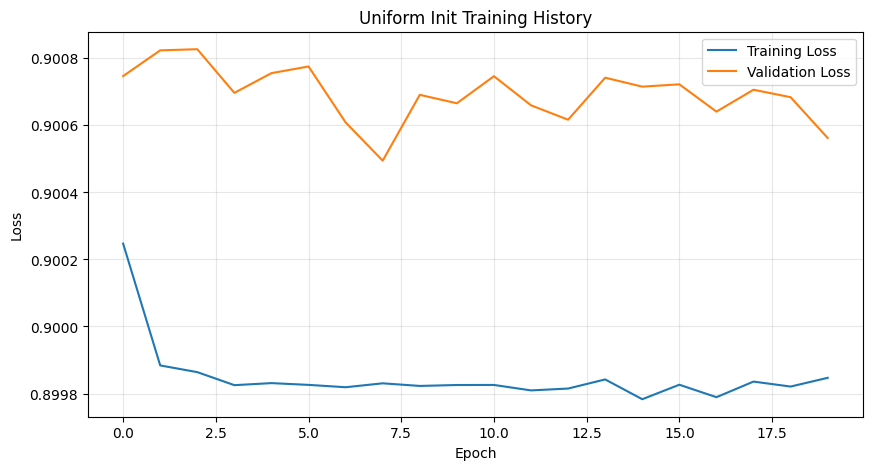

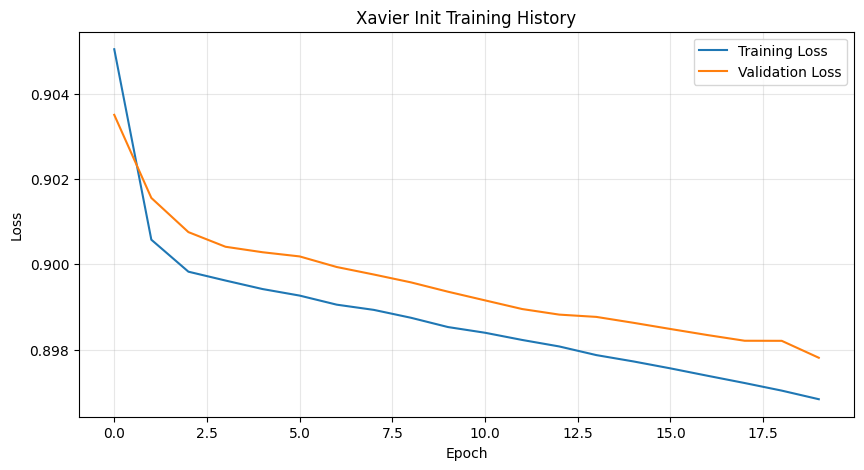

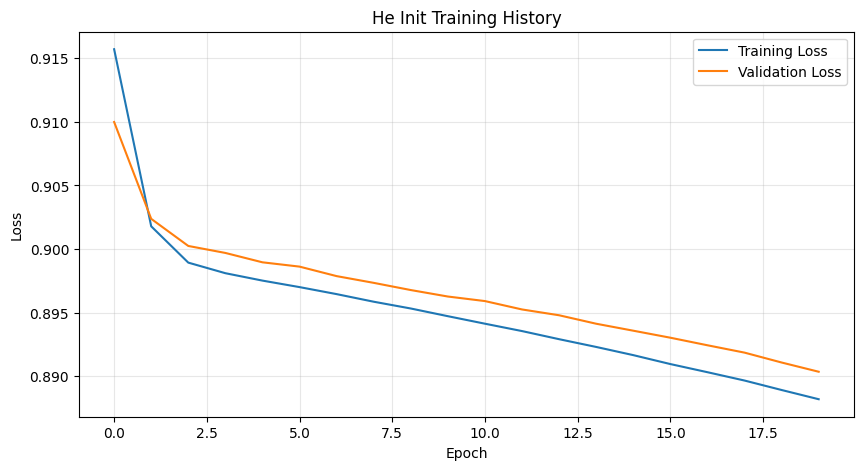

In [9]:
# Plot the training history
plot_training_loss(zero_init_history, "Zero Init Training History")

plot_training_loss(normal_init_history, "Normal Init Training History")

plot_training_loss(uniform_init_history, "Uniform Init Training History")

plot_training_loss(xavier_init_history, "Xavier Init Training History")

plot_training_loss(he_init_history, "He Init Training History")

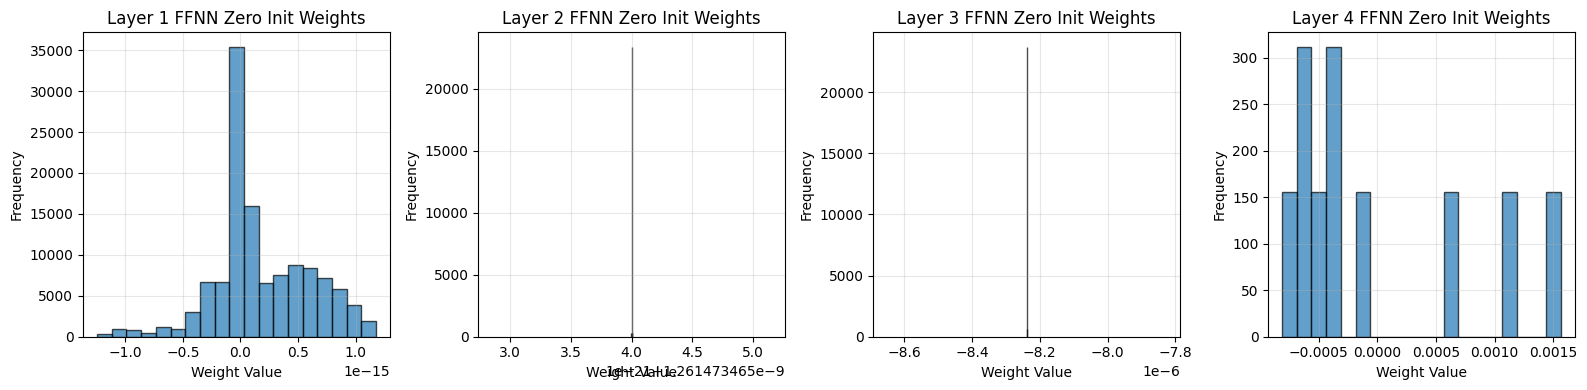

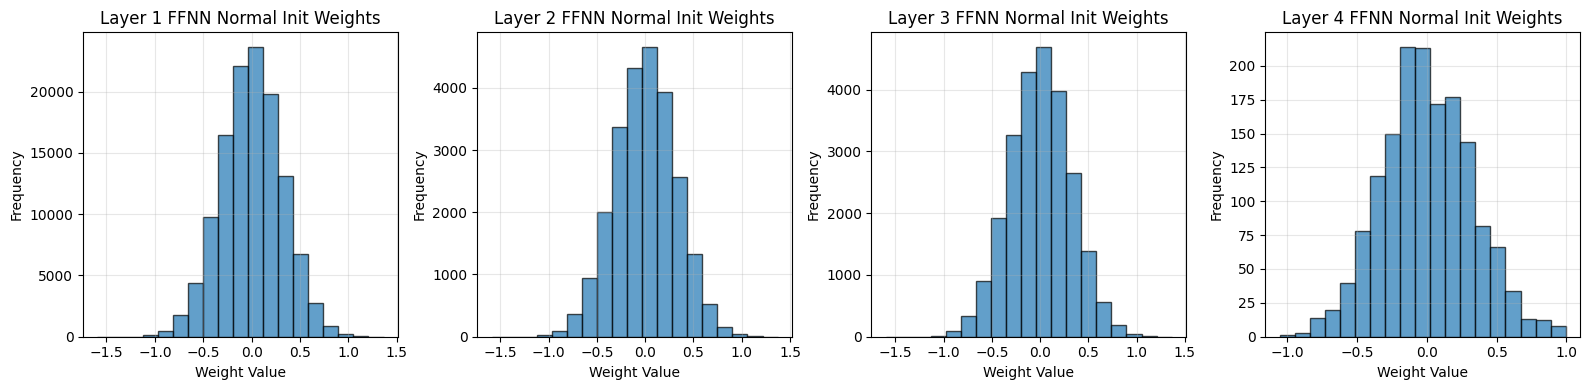

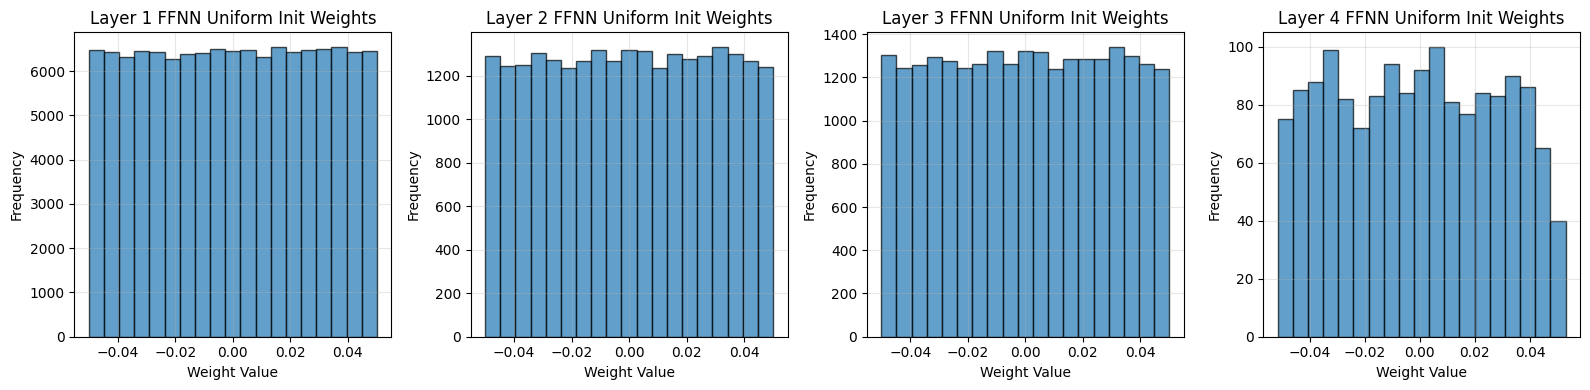

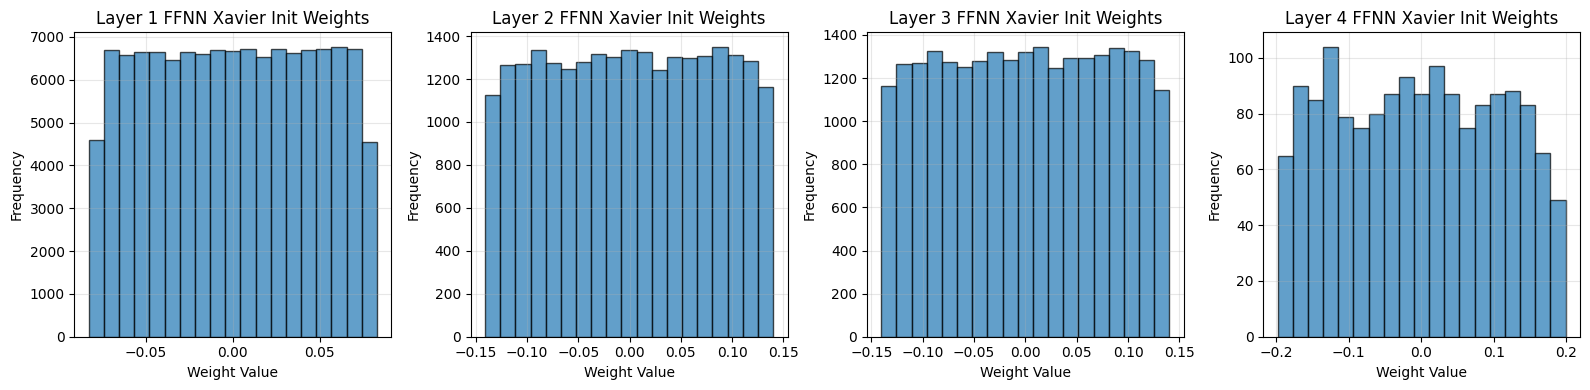

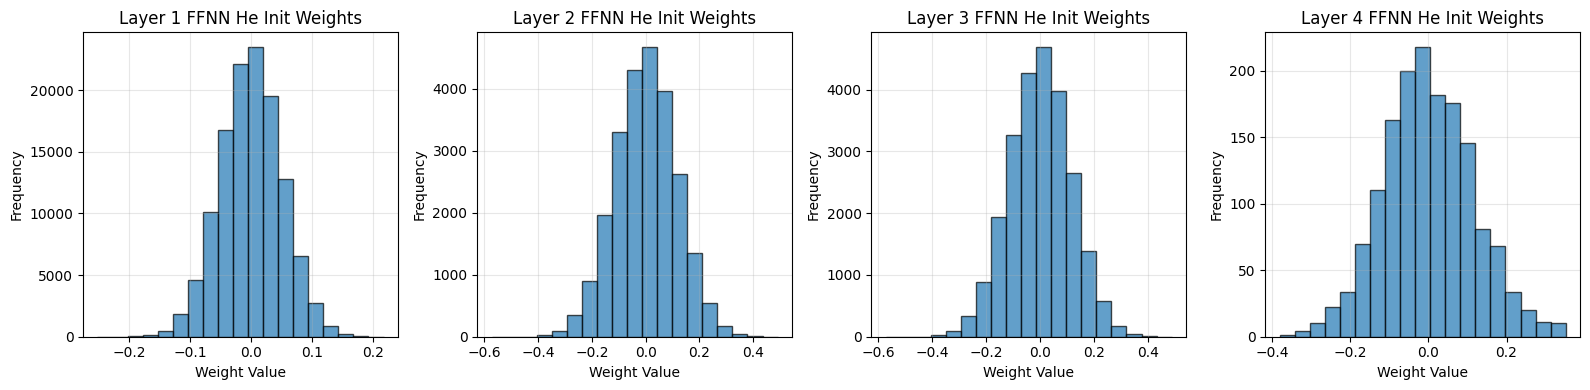

In [10]:
# Plot Weights
ffnn_zero_init.plot_weights(title="FFNN Zero Init Weights")

ffnn_normal_init.plot_weights(title="FFNN Normal Init Weights")

ffnn_uniform_init.plot_weights(title="FFNN Uniform Init Weights")

ffnn_xavier_init.plot_weights(title="FFNN Xavier Init Weights")

ffnn_he_init.plot_weights(title="FFNN He Init Weights")

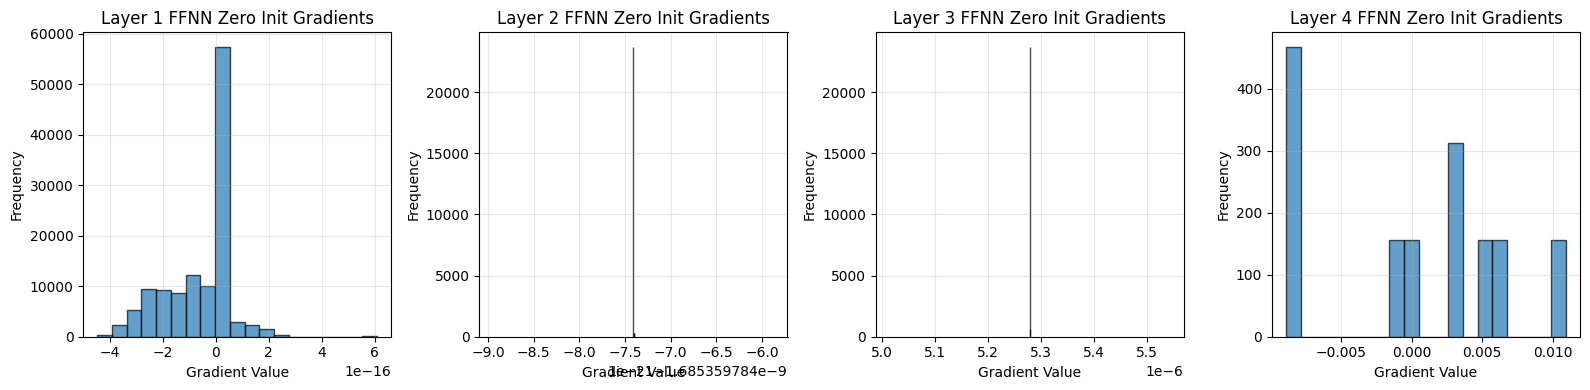

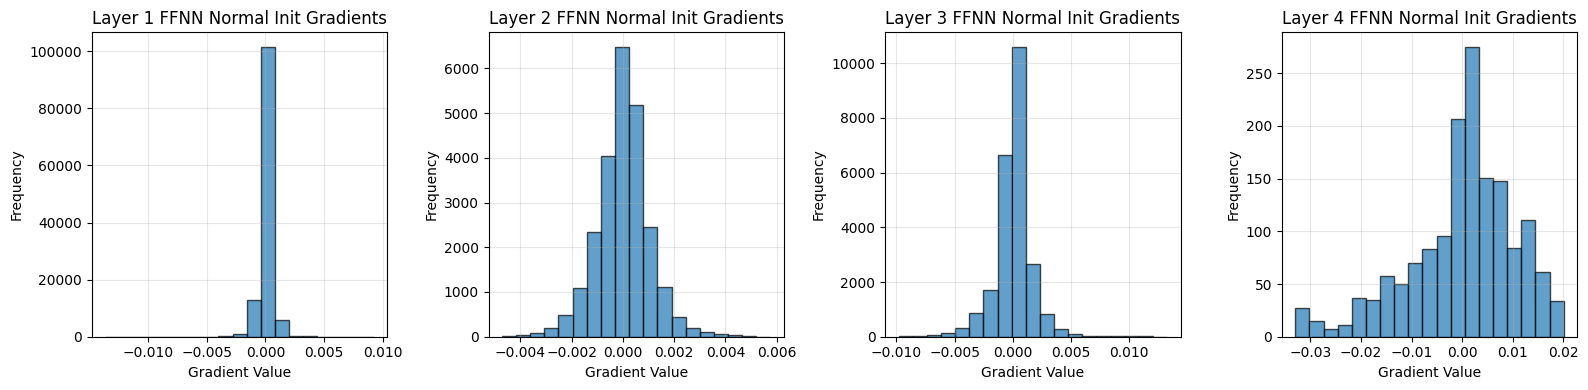

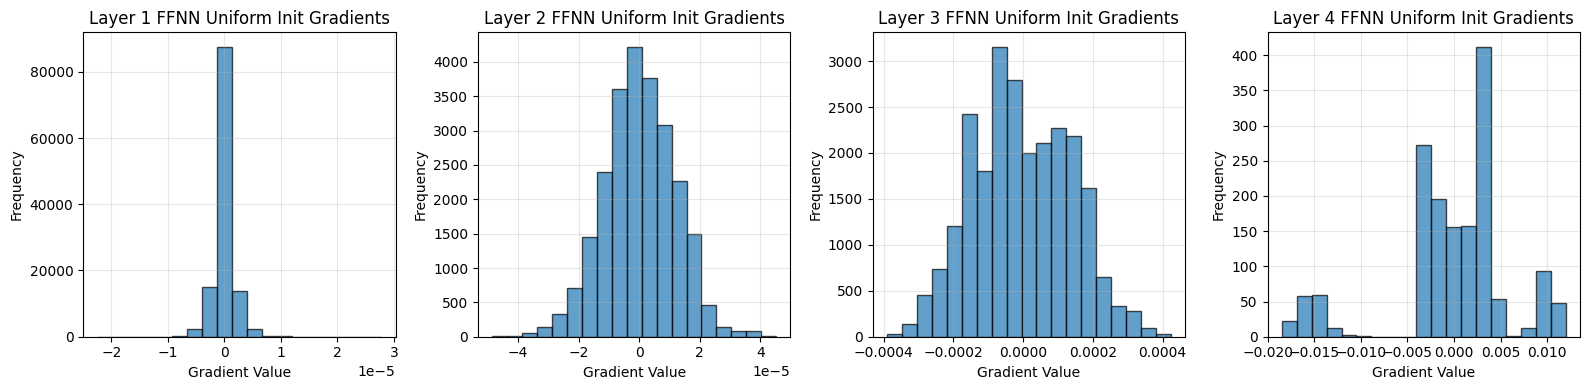

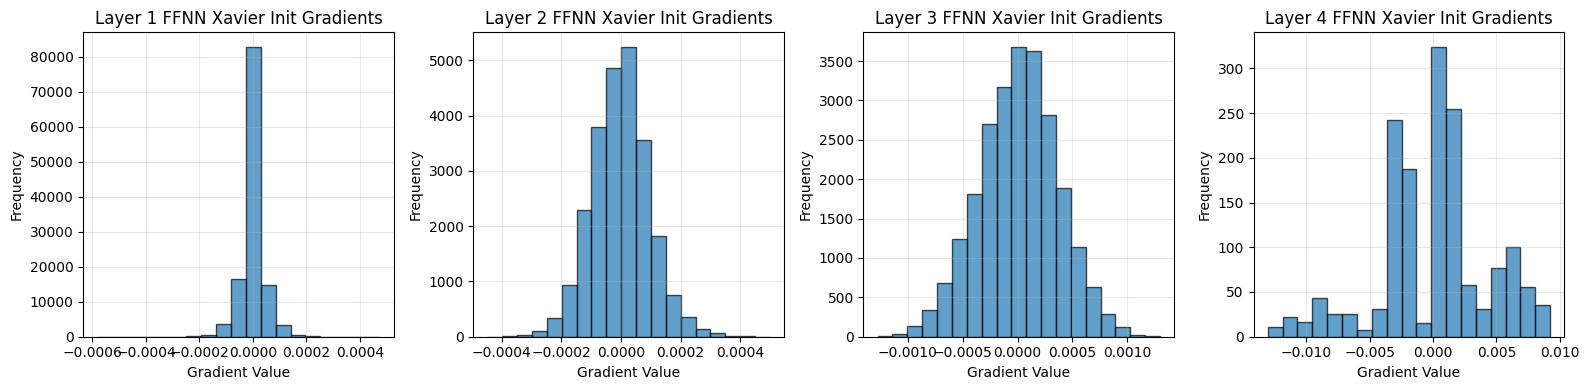

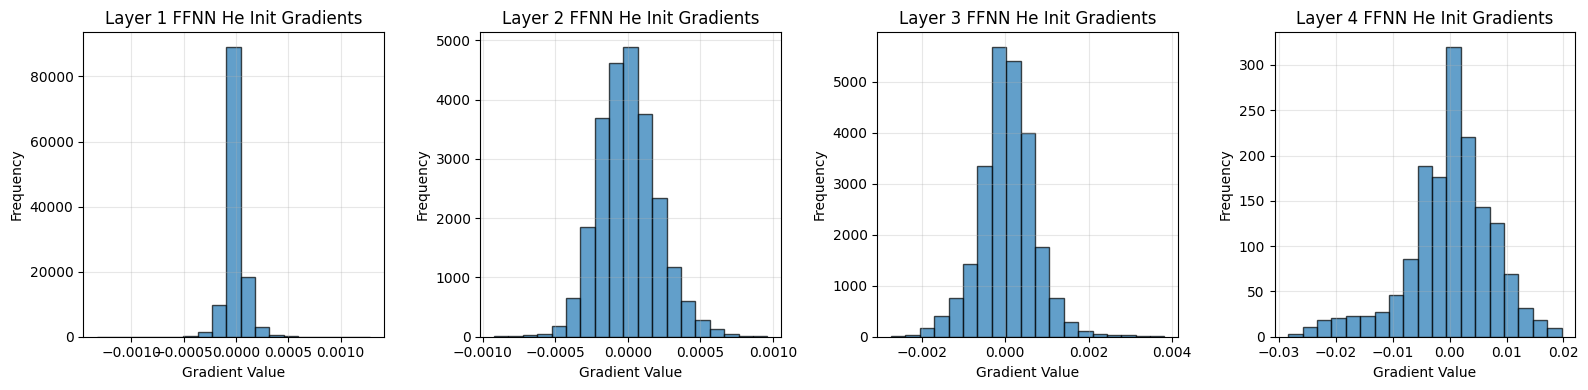

In [11]:
# Plot Gradient of Weights
ffnn_zero_init.plot_gradients(title="FFNN Zero Init Gradients")

ffnn_normal_init.plot_gradients(title="FFNN Normal Init Gradients")

ffnn_uniform_init.plot_gradients(title="FFNN Uniform Init Gradients")

ffnn_xavier_init.plot_gradients(title="FFNN Xavier Init Gradients")

ffnn_he_init.plot_gradients(title="FFNN He Init Gradients")